# Практическое занятие: Проверка статистических гипотез

## Введение

В этом практическом занятии вы научитесь применять различные методы проверки статистических гипотез на реальных примерах. Мы рассмотрим:

1. Одновыборочный t-тест
2. Двухвыборочный t-тест
3. Тест хи-квадрат
4. Однофакторный дисперсионный анализ (ANOVA)

### Цели занятия:
- Научиться формулировать статистические гипотезы
- Освоить применение различных статистических тестов
- Научиться интерпретировать результаты тестов
- Получить практический опыт анализа данных

### Требования:
- Базовое понимание статистики
- Знание Python и основных библиотек для анализа данных
- Jupyter Notebook

## 1. Подготовка к работе

Сначала импортируем необходимые библиотеки и создадим тестовые наборы данных для наших упражнений.

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка для отображения графиков
sns.set_theme()  # Используем настройки seaborn напрямую
plt.style.use('default')  # Используем стандартный стиль matplotlib

# Для воспроизводимости результатов
np.random.seed(42)

# Создаем тестовые наборы данных
# 1. Данные для одновыборочного t-теста
sample_1 = np.random.normal(loc=102, scale=15, size=100)  # Рост студентов

# 2. Данные для двухвыборочного t-теста
group_a = np.random.normal(loc=75, scale=10, size=50)  # Результаты теста группы A
group_b = np.random.normal(loc=80, scale=10, size=50)  # Результаты теста группы B

# 3. Данные для теста хи-квадрат
# Создадим данные о предпочтениях в еде и музыке
food_preferences = np.random.choice(['Пицца', 'Суши', 'Бургер'], size=100)
music_preferences = np.random.choice(['Рок', 'Поп', 'Джаз'], size=100)

# 4. Данные для ANOVA
group_1 = np.random.normal(loc=20, scale=5, size=30)  # Метод обучения 1
group_2 = np.random.normal(loc=22, scale=5, size=30)  # Метод обучения 2
group_3 = np.random.normal(loc=25, scale=5, size=30)  # Метод обучения 3

## 2. Одновыборочный t-тест

### Теория
Одновыборочный t-тест используется для проверки гипотезы о том, что среднее значение выборки статистически значимо отличается от известного или предполагаемого значения генеральной совокупности.

### Пример: Рост студентов
Предположим, что средний рост студентов в стране составляет 100 см. Мы хотим проверить, отличается ли средний рост в нашей выборке от этого значения.

#### Формулировка гипотез:
- H₀: μ = 100 (средний рост равен 100 см)
- H₁: μ ≠ 100 (средний рост не равен 100 см)

Описательная статистика выборки:
Средний рост: 100.44 см
Стандартное отклонение: 13.62 см


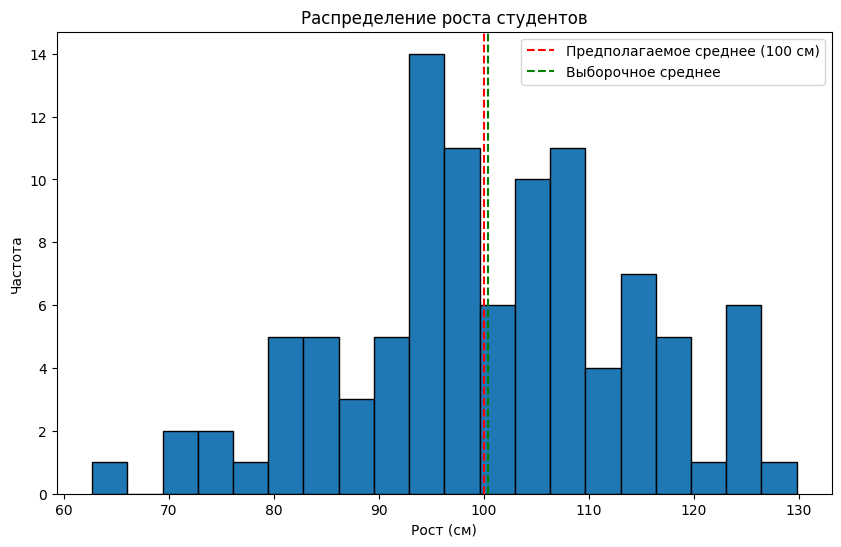


Результаты одновыборочного t-теста:
t-статистика: 0.3247
p-значение: 0.7461

Вывод:
Не отвергаем нулевую гипотезу - нет статистически значимых различий


In [2]:
# Решение примера
print("Описательная статистика выборки:")
print(f"Средний рост: {np.mean(sample_1):.2f} см")
print(f"Стандартное отклонение: {np.std(sample_1, ddof=1):.2f} см")

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.hist(sample_1, bins=20, edgecolor='black')
plt.axvline(100, color='red', linestyle='--', label='Предполагаемое среднее (100 см)')
plt.axvline(np.mean(sample_1), color='green', linestyle='--', label='Выборочное среднее')
plt.title('Распределение роста студентов')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Проведение t-теста
t_statistic, p_value = stats.ttest_1samp(sample_1, 100)

print("\nРезультаты одновыборочного t-теста:")
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")
print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимые различия")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимых различий")

### Задание для самостоятельной работы

Вам предоставлены данные о времени выполнения теста студентами. Предполагается, что среднее время выполнения теста составляет 45 минут.

Проведите одновыборочный t-тест, чтобы проверить это предположение:

1. Создайте выборку из 80 наблюдений со средним 47 минут и стандартным отклонением 5 минут
2. Сформулируйте нулевую и альтернативную гипотезы
3. Визуализируйте данные
4. Проведите t-тест
5. Сделайте выводы

Используйте приведенный выше пример как образец для выполнения задания.

## 3. Двухвыборочный t-тест

### Теория
Двухвыборочный t-тест используется для сравнения средних значений двух независимых выборок. Он помогает определить, есть ли статистически значимая разница между средними значениями двух групп.

### Пример: Сравнение результатов тестирования
Сравним результаты тестирования двух групп студентов, обучающихся по разным методикам.

#### Формулировка гипотез:
- H₀: μ₁ = μ₂ (средние баллы групп равны)
- H₁: μ₁ ≠ μ₂ (средние баллы групп различаются)

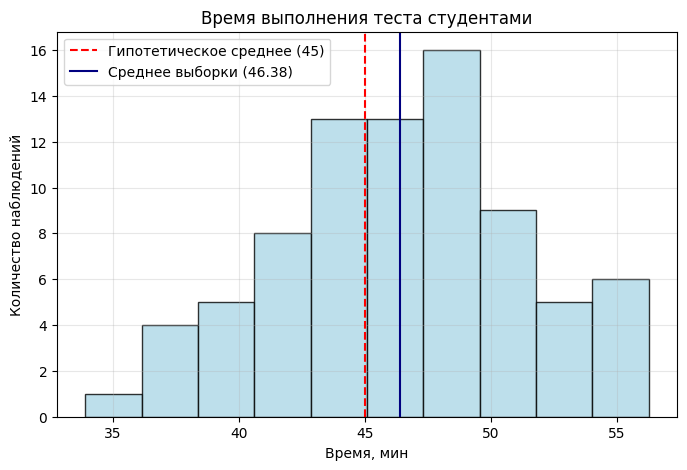

t-статистика: 2.580
p-значение: 0.0117
Среднее выборки: 46.38

Интерпретация результата:
Так как p < 0.05, нулевая гипотеза отклоняется.
Среднее время статистически отличается от 45 минут.
Студенты в среднем выполняли тест дольше.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

n_students = 80
sample_mean = 47
sample_std = 5
hypothesis_mean = 45

times = np.random.normal(loc=sample_mean, scale=sample_std, size=n_students)

plt.figure(figsize=(8, 5))
plt.hist(times, bins=10, color='lightblue', edgecolor='black', alpha=0.8)
plt.axvline(hypothesis_mean, color='red', linestyle='--', label='Гипотетическое среднее (45)')
plt.axvline(np.mean(times), color='navy', linestyle='-', label=f'Среднее выборки ({np.mean(times):.2f})')
plt.title('Время выполнения теста студентами')
plt.xlabel('Время, мин')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

t_value, p_val = stats.ttest_1samp(times, popmean=hypothesis_mean)

print(f"t-статистика: {t_value:.3f}")
print(f"p-значение: {p_val:.4f}")
print(f"Среднее выборки: {np.mean(times):.2f}")

alpha = 0.05
print("\nИнтерпретация результата:")
if p_val < alpha:
    print("Так как p < 0.05, нулевая гипотеза отклоняется.")
    print("Среднее время статистически отличается от 45 минут.")
    if np.mean(times) > hypothesis_mean:
        print("Студенты в среднем выполняли тест дольше.")
    else:
        print("Студенты в среднем выполняли тест быстрее.")
else:
    print("Так как p ≥ 0.05, нет оснований отклонять нулевую гипотезу.")
    print("Среднее время выполнения теста не отличается от 45 минут.")


Описательная статистика:

Группа A:
Среднее: 74.61
Стандартное отклонение: 10.15

Группа B:
Среднее: 80.84
Стандартное отклонение: 8.94


C:\Users\najom\AppData\Local\Temp\ipykernel_21268\2182935639.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a, group_b], labels=['Группа A', 'Группа B'])


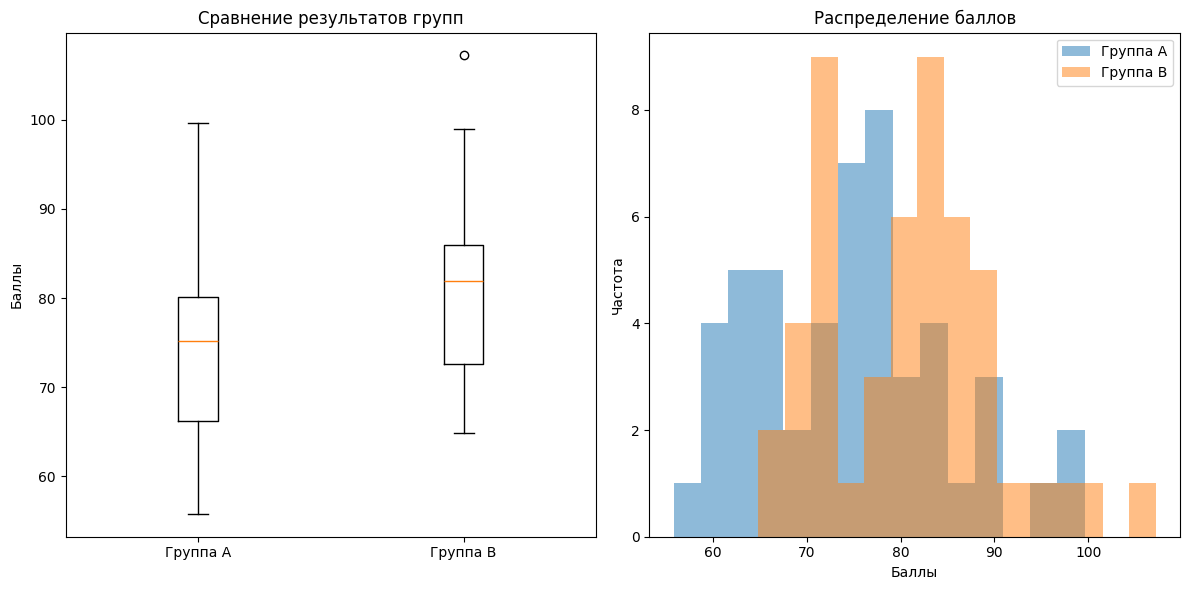


Результаты двухвыборочного t-теста:
t-статистика: -3.2576
p-значение: 0.0015

Вывод:
Отвергаем нулевую гипотезу - есть статистически значимые различия между группами


In [5]:
# Анализ данных групп
print("Описательная статистика:")
print("\nГруппа A:")
print(f"Среднее: {np.mean(group_a):.2f}")
print(f"Стандартное отклонение: {np.std(group_a, ddof=1):.2f}")
print("\nГруппа B:")
print(f"Среднее: {np.mean(group_b):.2f}")
print(f"Стандартное отклонение: {np.std(group_b, ddof=1):.2f}")

# Визуализация
plt.figure(figsize=(12, 6))

# Диаграмма размаха (boxplot)
plt.subplot(1, 2, 1)
plt.boxplot([group_a, group_b], labels=['Группа A', 'Группа B'])
plt.title('Сравнение результатов групп')
plt.ylabel('Баллы')

# Гистограммы
plt.subplot(1, 2, 2)
plt.hist(group_a, alpha=0.5, label='Группа A', bins=15)
plt.hist(group_b, alpha=0.5, label='Группа B', bins=15)
plt.title('Распределение баллов')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

print("\nРезультаты двухвыборочного t-теста:")
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")
print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимые различия между группами")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимых различий между группами")

### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности двух методов тренировки:

1. Создайте две выборки:
   - Группа 1: 40 спортсменов, тренирующихся по методу A (среднее время = 15 минут, станд. откл. = 3)
   - Группа 2: 40 спортсменов, тренирующихся по методу B (среднее время = 17 минут, станд. откл. = 3)

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите двухвыборочный t-тест
   - Сделайте выводы об эффективности методов тренировки

Используйте приведенный выше пример как образец для выполнения задания.

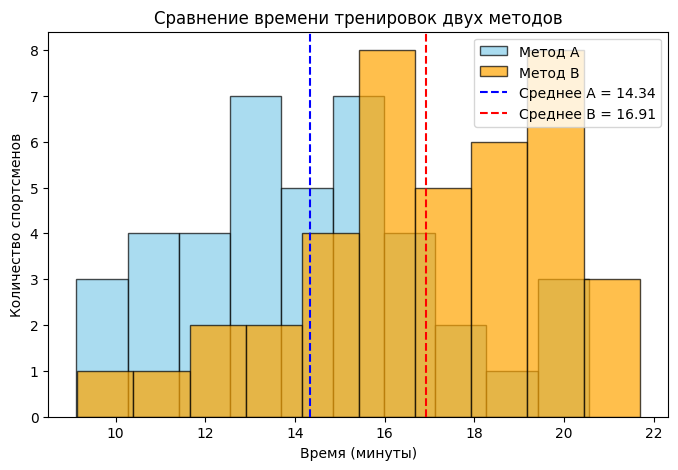

t-статистика = -3.994
p-значение = 0.0001
Среднее группы A = 14.34
Среднее группы B = 16.91

Вывод:
p < 0.05 → отвергаем H₀.
Метод A эффективнее (тренировки занимают меньше времени).


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

n = 40
mean_A = 15
mean_B = 17
std = 3

group_A = np.random.normal(mean_A, std, n)
group_B = np.random.normal(mean_B, std, n)

plt.figure(figsize=(8,5))
plt.hist(group_A, bins=10, alpha=0.7, label='Метод A', color='skyblue', edgecolor='black')
plt.hist(group_B, bins=10, alpha=0.7, label='Метод B', color='orange', edgecolor='black')
plt.axvline(np.mean(group_A), color='blue', linestyle='--', label=f'Среднее A = {np.mean(group_A):.2f}')
plt.axvline(np.mean(group_B), color='red', linestyle='--', label=f'Среднее B = {np.mean(group_B):.2f}')
plt.title('Сравнение времени тренировок двух методов')
plt.xlabel('Время (минуты)')
plt.ylabel('Количество спортсменов')
plt.legend()
plt.show()

t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f"t-статистика = {t_stat:.3f}")
print(f"p-значение = {p_value:.4f}")
print(f"Среднее группы A = {np.mean(group_A):.2f}")
print(f"Среднее группы B = {np.mean(group_B):.2f}")

alpha = 0.05
print("\nВывод:")
if p_value < alpha:
    print("p < 0.05 → отвергаем H₀.")
    if np.mean(group_A) < np.mean(group_B):
        print("Метод A эффективнее (тренировки занимают меньше времени).")
    else:
        print("Метод B эффективнее (тренировки занимают меньше времени).")
else:
    print("p ≥ 0.05 → нет статистически значимых различий между методами.")

## 4. Тест хи-квадрат

### Теория
Тест хи-квадрат используется для анализа связи между категориальными переменными. Он помогает определить, существует ли статистически значимая зависимость между двумя номинальными переменными.

### Пример: Анализ предпочтений
Исследуем связь между предпочтениями в еде и музыке.

#### Формулировка гипотез:
- H₀: Нет связи между предпочтениями в еде и музыке
- H₁: Существует связь между предпочтениями в еде и музыке

Таблица сопряженности:
Музыка  Джаз  Поп  Рок
Еда                   
Бургер     7   13   10
Пицца      9    8   16
Суши      10   12   15


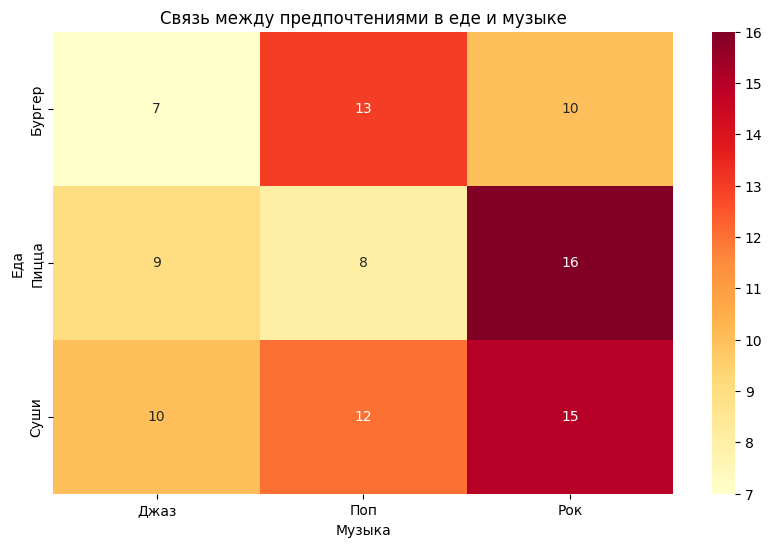


Результаты теста хи-квадрат:
Статистика хи-квадрат: 2.7418
p-значение: 0.6019
Степени свободы: 4

Вывод:
Не отвергаем нулевую гипотезу - нет статистически значимой связи между переменными


In [7]:
# Создание таблицы сопряженности
contingency_table = pd.crosstab(pd.Series(food_preferences, name='Еда'),
                               pd.Series(music_preferences, name='Музыка'))

print("Таблица сопряженности:")
print(contingency_table)

# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Связь между предпочтениями в еде и музыке')
plt.show()

# Проведение теста хи-квадрат
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nРезультаты теста хи-квадрат:")
print(f"Статистика хи-квадрат: {chi2:.4f}")
print(f"p-значение: {p_value:.4f}")
print(f"Степени свободы: {dof}")

print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимая связь между переменными")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимой связи между переменными")

### Задание для самостоятельной работы

Проведите анализ связи между полом студентов и их выбором специальности:

1. Создайте данные:
   - 100 студентов
   - Пол: 'М' или 'Ж'
   - Специальность: 'Информатика', 'Биология', 'Физика'

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте таблицу сопряженности
   - Визуализируйте данные с помощью тепловой карты
   - Проведите тест хи-квадрат
   - Интерпретируйте результаты

Используйте приведенный выше пример как образец для выполнения задания.

Пример данных:
        Пол Специальность
96  Женщина      Биология
11  Женщина   Информатика
54  Женщина        Физика
51  Женщина   Информатика
41  Мужчина   Информатика

Таблица сопряженности (частоты):
Специальность  Биология  Информатика  Физика
Пол                                         
Женщина              15           21      11
Мужчина              14           23      16


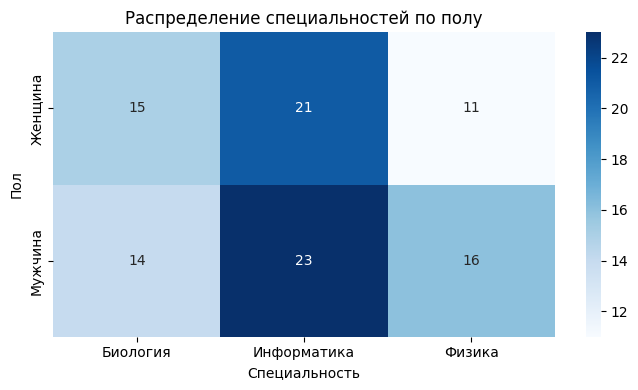


Результаты χ²-теста:
χ² = 0.694
Степени свободы = 2
p-значение = 0.7069

Интерпретация:
Так как p ≥ 0.05, нулевая гипотеза не отклоняется.
Связь между полом и выбором специальности статистически не подтверждена.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

np.random.seed(42)

sample_size = 100
gender = np.random.choice(['Мужчина', 'Женщина'], size=sample_size, p=[0.5, 0.5])
specialty = np.random.choice(['Информатика', 'Биология', 'Физика'], size=sample_size, p=[0.4, 0.35, 0.25])

df = pd.DataFrame({'Пол': gender, 'Специальность': specialty})

print("Пример данных:")
print(df.sample(5))

cross_tab = pd.crosstab(df['Пол'], df['Специальность'])
print("\nТаблица сопряженности (частоты):")
print(cross_tab)

plt.figure(figsize=(7, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Распределение специальностей по полу')
plt.xlabel('Специальность')
plt.ylabel('Пол')
plt.tight_layout()
plt.show()

chi2_stat, p_val, dfree, exp_table = chi2_contingency(cross_tab)

print("\nРезультаты χ²-теста:")
print(f"χ² = {chi2_stat:.3f}")
print(f"Степени свободы = {dfree}")
print(f"p-значение = {p_val:.4f}")

alpha = 0.05
print("\nИнтерпретация:")
if p_val < alpha:
    print("Так как p < 0.05, нулевая гипотеза отклоняется.")
    print("Между полом и выбором специальности существует статистически значимая зависимость.")
else:
    print("Так как p ≥ 0.05, нулевая гипотеза не отклоняется.")
    print("Связь между полом и выбором специальности статистически не подтверждена.")


## 5. Однофакторный дисперсионный анализ (ANOVA)

### Теория
ANOVA используется для сравнения средних значений трех и более групп. Этот метод позволяет определить, есть ли статистически значимые различия между группами.

### Пример: Сравнение методов обучения
Сравним эффективность трех различных методов обучения, измеряя результаты тестирования студентов.

#### Формулировка гипотез:
- H₀: μ₁ = μ₂ = μ₃ (средние баллы всех групп равны)
- H₁: Хотя бы одна группа имеет отличное среднее значение

Описательная статистика по группам:

Метод 1:
Среднее: 19.09
Стандартное отклонение: 6.02

Метод 2:
Среднее: 21.53
Стандартное отклонение: 5.42

Метод 3:
Среднее: 23.45
Стандартное отклонение: 5.02


C:\Users\najom\AppData\Local\Temp\ipykernel_21268\2430944811.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=group_names)


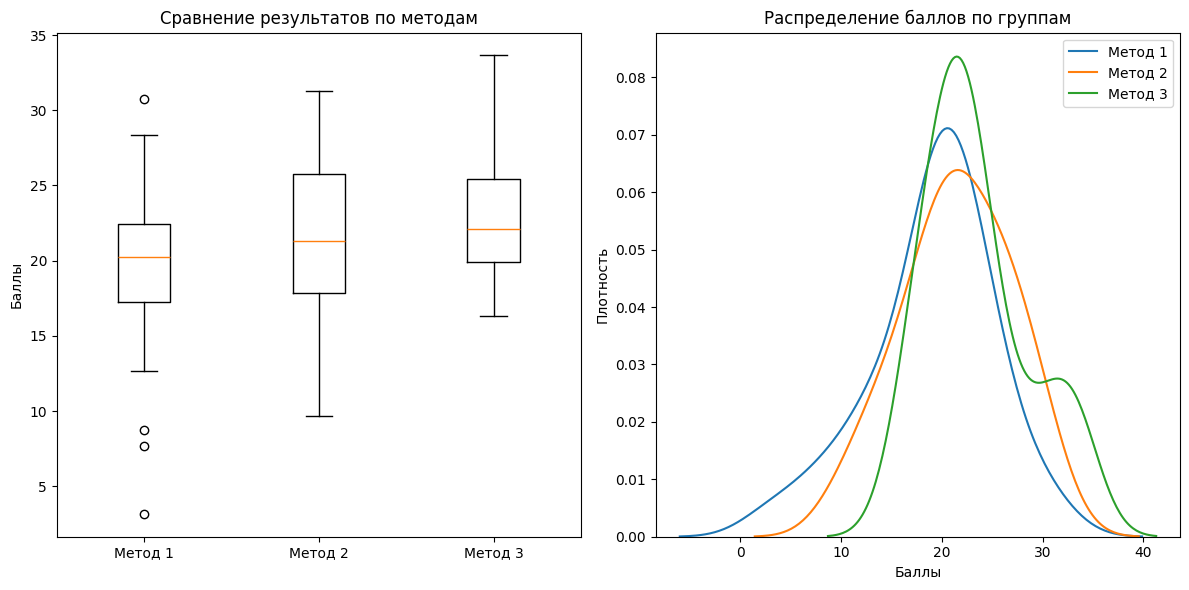


Результаты однофакторного дисперсионного анализа:
F-статистика: 4.7258
p-значение: 0.0113

Вывод:
Отвергаем нулевую гипотезу - есть статистически значимые различия между группами


In [9]:
# Анализ данных
groups = [group_1, group_2, group_3]
group_names = ['Метод 1', 'Метод 2', 'Метод 3']

# Описательная статистика
print("Описательная статистика по группам:")
for name, group in zip(group_names, groups):
    print(f"\n{name}:")
    print(f"Среднее: {np.mean(group):.2f}")
    print(f"Стандартное отклонение: {np.std(group, ddof=1):.2f}")

# Визуализация
plt.figure(figsize=(12, 6))

# Диаграмма размаха
plt.subplot(1, 2, 1)
plt.boxplot(groups, labels=group_names)
plt.title('Сравнение результатов по методам')
plt.ylabel('Баллы')

# Распределения
plt.subplot(1, 2, 2)
for group, name in zip(groups, group_names):
    sns.kdeplot(data=group, label=name)
plt.title('Распределение баллов по группам')
plt.xlabel('Баллы')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

# Проведение ANOVA
f_statistic, p_value = stats.f_oneway(group_1, group_2, group_3)

print("\nРезультаты однофакторного дисперсионного анализа:")
print(f"F-статистика: {f_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")

print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимые различия между группами")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимых различий между группами")

### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности трех различных диет:

1. Создайте данные для трех групп по 25 человек:
   - Диета А: среднее снижение веса 5 кг, станд. откл. = 1.5
   - Диета B: среднее снижение веса 6 кг, станд. откл. = 1.5
   - Диета C: среднее снижение веса 4 кг, станд. откл. = 1.5

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите однофакторный дисперсионный анализ
   - Сделайте выводы об эффективности диет

Используйте приведенный выше пример как образец для выполнения задания.

## Заключение

В этом практическом занятии вы познакомились с основными методами проверки статистических гипотез:
- Одновыборочный t-тест
- Двухвыборочный t-тест
- Тест хи-квадрат
- Однофакторный дисперсионный анализ (ANOVA)

Для закрепления материала рекомендуется:
1. Выполнить все практические задания
2. Проанализировать различия между методами
3. Попрактиковаться в интерпретации результатов
4. Поэкспериментировать с различными параметрами данных

H0: Среднее снижение веса одинаково для всех диет
H1: Среднее снижение веса различается хотя бы для одной диеты



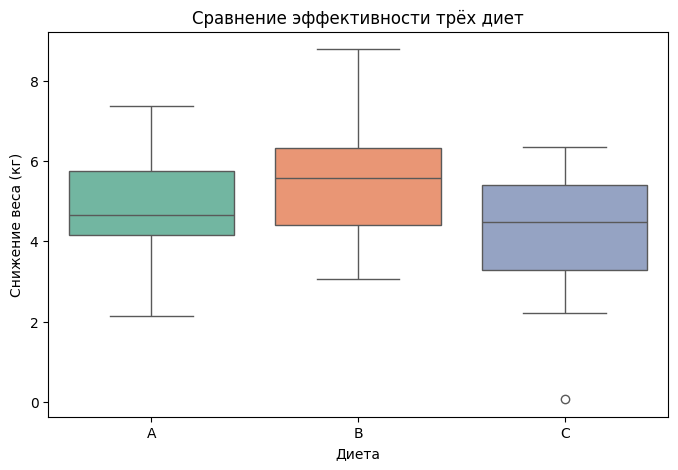

Статистика F = 6.079
p-значение = 0.0036

Отвергаем H0 → Есть статистически значимые различия между диетами.


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

diet_a = np.random.normal(5, 1.5, 25)
diet_b = np.random.normal(6, 1.5, 25)
diet_c = np.random.normal(4, 1.5, 25)

data = pd.DataFrame({
    'Снижение веса (кг)': np.concatenate([diet_a, diet_b, diet_c]),
    'Диета': ['A'] * 25 + ['B'] * 25 + ['C'] * 25
})

print("H0: Среднее снижение веса одинаково для всех диет")
print("H1: Среднее снижение веса различается хотя бы для одной диеты\n")

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Диета', y='Снижение веса (кг)', hue='Диета', palette='Set2', legend=False)
plt.title('Сравнение эффективности трёх диет')
plt.show()

f_stat, p_value = stats.f_oneway(diet_a, diet_b, diet_c)

print(f"Статистика F = {f_stat:.3f}")
print(f"p-значение = {p_value:.4f}\n")

if p_value < 0.05:
    print("Отвергаем H0 → Есть статистически значимые различия между диетами.")
else:
    print("Не отвергаем H0 → Различия между диетами статистически незначимы.")